In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [30]:
"""Problem 3
Proszę o pobranie danych ze źródła:
https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data

Zbiór danych dotyczy kilku gatunków pingwinów żyjących na wyspach archipelagu Palmera. Każdy pingwin jest opisany za pomocą 7 cech (gatunek, zamieszkiwana wyspa, długość dzioba [mm], grubość dzioba [mm], długość skrzydła [mm], masa ciała [g], płeć osobnika). 
Należy zastosować klasyfikatory w postaci drzew decyzynych, lasów losowych oraz metod zespołowych ze wzmocnieniem gradientowym do klasyfikacji pingiwnów na podstawie ich budowy fizycznej.

1. Przygotowanie danych.
1.1. Wczytanie danych zajdujących się w pliku penguins_size.csv do struktury DataFrame. 
1.2. Sprawdzenie brakujących danych (usunięcie danych niepełnych).
1.3. Podstawowe statystki.
1.4. Usunięcie danych niepełnych.
1.5. Wizualizacja danych:	
	wykres punktowy zależności długości dzioba [mm] od grubości dzioba [mm] (różnicowanie za pomocą kolumny 'spicies'),
	wykres porównawczy wszystkich cech (różnicowanie za pomocą kolumny 'spicies').
	wykres pudełkowy rozkładu długości dzioba w zależności od gatunku pingwina z uwzględnieniem płci (2 wykresy pudełkowe).
1.6. Przekształcenie danych kategorialnych - uwtowrzenie nowej struktury DataFrame:
		Stworzenie zmiennej fikcyjnej (dummy variables) dotyczącej gatunku pingwina.
		Stworzenie zmiennej fikcyjnej (dummy variables) dotyczącej zamieszkiwanej przez danego pingwina wyspy.
		Stworzenie zmiennej fikcyjnej (dummy variables) dotyczącej płci.
2. Podział zbioru danych na dane treningowe i testowe, zbiór testowy stanowi 30% całego zbioru danych, random_state = 101 (X - cechy, y - atrybut decyzyny).
3. Budowa modelu drzewa decyzyjnego:
	3.1. Wytrenowanie modelu.
	3.2. Wypróbowanie modelu na zbiorze testowym.
	3.3. Ewaluacja modelu na podstawie raportu z klasyfikacji i macierzy błędów.	
	3.4. Informacja nt. wagi cech (feature_importances_).

4. Wizualizacja drzewa decyzyjnego (from sklearn.tree import plot_tree).
5. Dobór hiperparametrów (dla każdego hiperparametru trzeba wygenerować raport z klasyfikacji, macierz błędów i drzewo decyzyjne):
	5.1. Maksymalna wysokość drzewa równa 2 - przycięcie drzewa (prone) względem drzewa z punktu 3.
	5.2. maksymalna liczba liści równa 3.
	5.3. Kryterium podziału.
		5.3.1. Współczynnik Giniego
		5.3.2. Entropia

6. Budowa modelu lasu losowego:
	6.1. Wytrenowanie modelu: liczba drzew klasyfikacyjnych, które będą tworzyły las równa 10, poszukiwanie najlepszej cechy wśród losowego podzbioru cech jest automatyczne, random_state = 101.
	6.2. Wypróbowanie modelu na zbiorze testowym.
	6.3. Ewaluacja modelu na podstawie raportu z klasyfikacji i macierzy błędów.	
	6.4. Informacja nt. wagi cech (feature_importances_).
	6.5. Dobór odpowiedniej liczby drzew klasyfikacyjnych -> zależność n (w zakresie od 1 do 50) od błędu klasyfikowania.

7. Budowa modelu lasów ze wzmocnieniem gradientowym:
	7.1. Wytrenowanie modelu: liczba drzew klasyfikacyjnych, które będą tworzyły las równa 10, poszukiwanie najlepszej cechy wśród losowego podzbioru cech automatyczne, random_state =101.
	7.2. Wypróbowanie modelu na zbiorze testowym.
	7.3. Ewaluacja modelu na podstawie raportu z klasyfikacji i macierzy błędów.	
	7.4. Regulacja modelu -> metoda przeszukiwania siatki (GridSearch), liczba drzew klasyfikacyjnych, które będą tworzyć las, np. 1,5,10,20,40,100, maksymalna wysokość drzewa, np. 2,3,4,5,6.
	7.5. Zastosowanie odpowiednich parametrów i ewaluacja modelu na podstawie raportu z klasyfikacji i macierzy błędów."""

"Problem 3\nProszę o pobranie danych ze źródła:\nhttps://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data\n\nZbiór danych dotyczy kilku gatunków pingwinów żyjących na wyspach archipelagu Palmera. Każdy pingwin jest opisany za pomocą 7 cech (gatunek, zamieszkiwana wyspa, długość dzioba [mm], grubość dzioba [mm], długość skrzydła [mm], masa ciała [g], płeć osobnika). \nNależy zastosować klasyfikatory w postaci drzew decyzynych, lasów losowych oraz metod zespołowych ze wzmocnieniem gradientowym do klasyfikacji pingiwnów na podstawie ich budowy fizycznej.\n\n1. Przygotowanie danych.\n1.1. Wczytanie danych zajdujących się w pliku penguins_size.csv do struktury DataFrame. \n1.2. Sprawdzenie brakujących danych (usunięcie danych niepełnych).\n1.3. Podstawowe statystki.\n1.4. Usunięcie danych niepełnych.\n1.5. Wizualizacja danych:\t\n\twykres punktowy zależności długości dzioba [mm] od grubości dzioba [mm] (różnicowanie za pomocą kolumny 'spicies'),\n\twykres porównawczy ws

In [31]:
# 1. Przygotowanie danych
# 1.1. Wczytanie danych
data = pd.read_csv("penguins_size.csv")

In [32]:
# 1.2. Sprawdzenie brakujących danych
print(data.isnull().sum())

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [33]:
data.shape

(344, 7)

In [34]:
# 1.3. Podstawowe statystki
print(data.describe())

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


In [35]:
# 1.4. Usunięcie danych niepełnych
data = data.dropna()

In [36]:
data.shape

(334, 7)

In [37]:
data.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

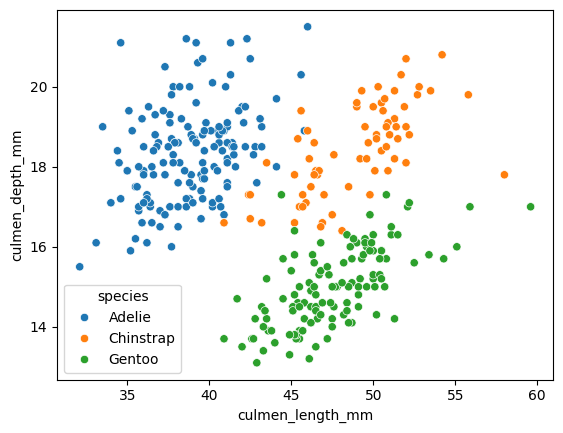

In [38]:
# 1.5. Wizualizacja danych
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', hue='species', data=data)
plt.show()

In [41]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [45]:
data_encoded = pd.get_dummies(data, columns=['species'], drop_first=True)

In [46]:
data_encoded

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_Chinstrap,species_Gentoo
0,Torgersen,39.1,18.7,181.0,3750.0,MALE,False,False
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,False,False
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,False,False
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,False,False
5,Torgersen,39.3,20.6,190.0,3650.0,MALE,False,False
...,...,...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,False,True
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,False,True
341,Biscoe,50.4,15.7,222.0,5750.0,MALE,False,True
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,False,True


In [44]:
# Podział zbioru danych na dane treningowe i testowe
X = data_encoded.drop('species_Encell', axis=1)
y = data_encoded['species_Encell']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

KeyError: "['species_Encell'] not found in axis"

In [27]:
encoded_data.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'species_Chinstrap', 'species_Gentoo', 'island_Dream',
       'island_Torgersen', 'sex_FEMALE', 'sex_MALE'],
      dtype='object')

In [28]:
# 2. Podział zbioru danych na dane treningowe i testowe
X = encoded_data.drop('species', axis=1)
y = encoded_data['species']

KeyError: "['species'] not found in axis"